In [11]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [12]:
from fastai.vision import *
from fastai.vision.models.wrn import wrn_22
from fastai.vision.models import *

## Prepare the data
Let's download the CIFAR10 data we are going to train&validate. Besides fastai, the CIFAR10 dataset is also available on kaggle, https://www.kaggle.com/c/cifar-10

On kaggle Leaderboard (both public and private), the #1 score is 0.9553 around 5 years ago.

State-of-art is GPipe, pushing accuracy to 99%, but 557 Million parameters… train this kind of model is burning money …
https://benchmarks.ai/cifar-10


In [13]:
path = untar_data(URLs.CIFAR)
path.ls()

[WindowsPath('C:/Users/Tim/.fastai/data/cifar10/ktest'),
 WindowsPath('C:/Users/Tim/.fastai/data/cifar10/labels.txt'),
 WindowsPath('C:/Users/Tim/.fastai/data/cifar10/models'),
 WindowsPath('C:/Users/Tim/.fastai/data/cifar10/sampleSubmission.csv'),
 WindowsPath('C:/Users/Tim/.fastai/data/cifar10/test'),
 WindowsPath('C:/Users/Tim/.fastai/data/cifar10/train')]

In [14]:
tfms = get_transforms(flip_vert=False, max_rotate=10, p_affine =1., p_lighting=1.,
                      max_lighting=0.2, max_zoom=1.2, max_warp=0.1)

In [15]:
bs = 200

In [16]:
data = ImageDataBunch.from_folder(path, size=96, valid='test', test='ktest/test', ds_tfms=tfms, bs=bs, padding_mode='reflection')

In [17]:
data.normalize(cifar_stats)

ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: C:\Users\Tim\.fastai\data\cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: C:\Users\Tim\.fastai\data\cifar10;

Test: LabelList (182442 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: EmptyLabelList
,,,,
Path: C:\Users\Tim\.fastai\data\cifar10

### Inspect the data

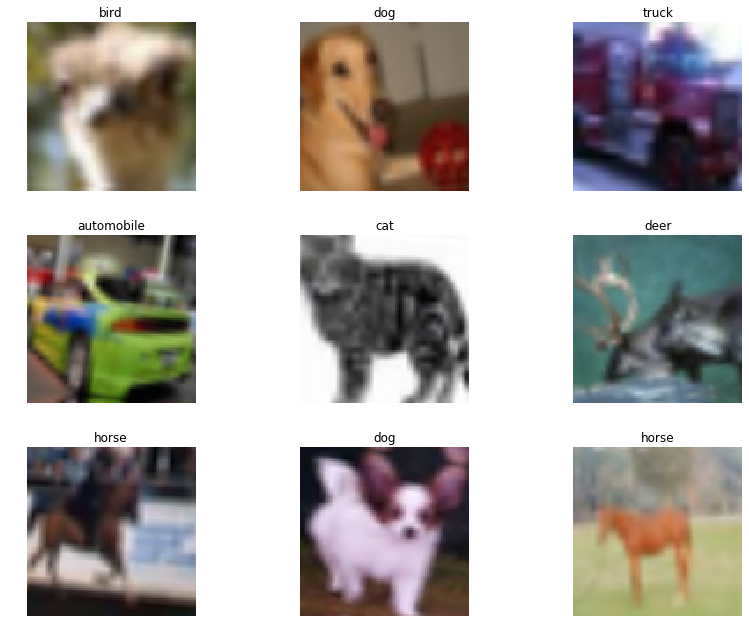

In [10]:
data.show_batch(rows=3, figsize=(12,9))

## Model Def & Train

In [19]:
arch = models.resnet34
#arch = WideResNet(num_groups=3, N=3, k=6, drop_p=.5, num_classes=10)

In [20]:
#learn = Learner(data, arch, metrics=accuracy)
learn = cnn_learner(data, arch, metrics=accuracy)
learn

Learner(data=ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: C:\Users\Tim\.fastai\data\cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: C:\Users\Tim\.fastai\data\cifar10;

Test: LabelList (182442 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: EmptyLabelList
,,,,
Path: C:\Users\Tim\.fastai\data\cifar10, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation

### Modify the model to fit this classification

In [11]:
#classes = 10

In [12]:
#n_inputs = learn.model.fc.in_features
#last_layer = nn.Linear(n_inputs, classes)
#learn.model.fc = last_layer

In [13]:
learn.to_fp16()


Learner(data=ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: C:\Users\Tim\.fastai\data\cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: C:\Users\Tim\.fastai\data\cifar10;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d

### Train the model

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


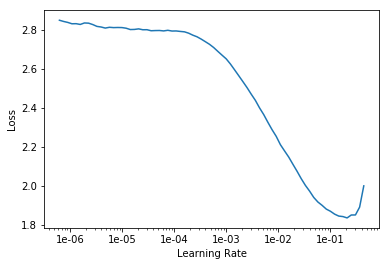

In [15]:
learn.recorder.plot()

In [16]:
lr = 2e-2

In [17]:
learn.fit_one_cycle(8, lr, wd=0.2)

epoch,train_loss,valid_loss,accuracy,time
0,0.476430,0.477230,0.842400,05:51
1,0.645896,0.765230,0.746400,06:09
2,0.701303,1.006901,0.674600,05:56
3,0.677878,0.603088,0.796000,05:47
4,0.619015,0.865245,0.718500,05:50
5,0.518108,0.474871,0.837900,05:50
6,0.429614,0.315963,0.889300,06:08
7,0.362803,0.290310,0.899400,06:01


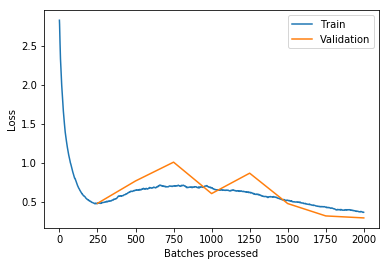

In [20]:
learn.recorder.plot_losses()

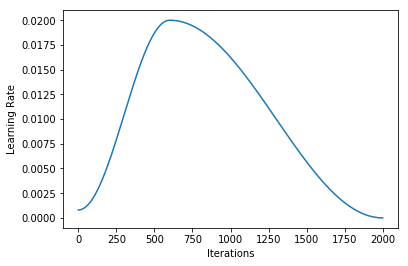

In [19]:
learn.recorder.plot_lr()

In [18]:
#learn.save('stage-1-wrn22')
#learn.save('stage-1-cnn-resnet34-fp16')
learn.save('stage-1-cnn-resnet34-fp16-96px')
#learn.save('stage-1-resnet34-fp32')

### Stage 2

In [ ]:
learn.load('stage-1-cnn-resnet34-fp16-96px')

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.to_fp16()

In [21]:
learn.unfreeze()

In [22]:
learn.fit_one_cycle(21, max_lr=slice(3e-3), wd=0.2)

epoch,train_loss,valid_loss,accuracy,time
0,0.346557,0.271973,0.906800,07:32
1,0.328373,0.262062,0.908500,07:26
2,0.337302,0.313200,0.890300,07:33
3,0.333923,0.270786,0.907800,07:39
4,0.328634,0.325405,0.887600,07:31
5,0.323482,0.326887,0.889100,07:31
6,0.289788,0.357150,0.880900,07:35
7,0.268412,0.269732,0.906800,07:29
8,0.248863,0.271462,0.910600,07:23
9,0.227351,0.233008,0.922300,07:22


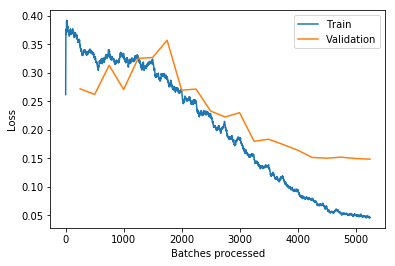

In [23]:
learn.recorder.plot_losses()

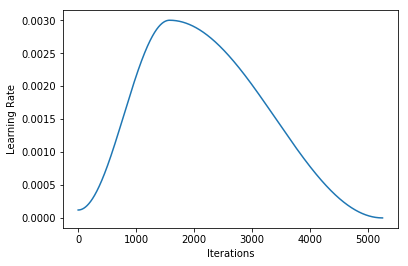

In [24]:
learn.recorder.plot_lr()

In [25]:
learn.save('stage-2-cnn-resnet34-fp16-96px')

In [21]:
learn.load('stage-2-cnn-resnet34-fp16-96px')
learn.to_fp16()

Learner(data=ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: C:\Users\Tim\.fastai\data\cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: CategoryList
airplane,airplane,airplane,airplane,airplane
Path: C:\Users\Tim\.fastai\data\cifar10;

Test: LabelList (182442 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: EmptyLabelList
,,,,
Path: C:\Users\Tim\.fastai\data\cifar10, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


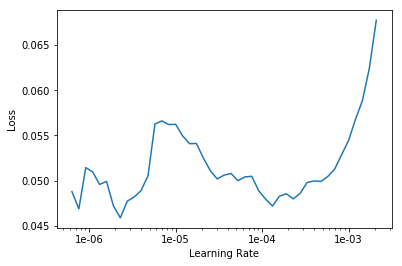

In [26]:
learn.lr_find()
learn.recorder.plot()

In [16]:
learn.freeze()

In [19]:
learn.fit_one_cycle(7, max_lr=slice(2e-3), wd=0.4)

epoch,train_loss,valid_loss,accuracy,time
0,0.048399,0.148705,0.955900,06:12
1,0.048617,0.154318,0.955800,06:24
2,0.050910,0.152431,0.955300,06:33
3,0.046836,0.149688,0.956500,06:31
4,0.051555,0.148793,0.955700,06:25
5,0.047808,0.149109,0.956400,06:15
6,0.043020,0.148221,0.956100,06:14


In [20]:
learn.fit_one_cycle(5, max_lr=slice(1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.046882,0.156905,0.955200,06:13
1,0.050730,0.154957,0.956300,06:25
2,0.047170,0.157577,0.956600,06:16
3,0.045628,0.157945,0.957000,06:13
4,0.043909,0.158118,0.957200,06:12


In [1]:
learn.fit_one_cycle(5, max_lr=slice(1e-3))

NameError: name 'learn' is not defined

In [22]:
learn.export()

## Predict kaggle test data and Submit to Competition

First download the test.7z from kaggle, notice that we have already 'test' folder as our validation dataset folder; we have to put kaggle test dataset into a different folder, e.g. 'ktest'

$ kaggle competitions download -c cifar-10

$ kaggle competitions submit -c cifar-10 -f submission.csv -m "Fastai is awesome, Tim@Shanghai"

In [23]:
ptest = path/'ktest'
ptest

WindowsPath('C:/Users/Tim/.fastai/data/cifar10/ktest')

In [24]:
#! mkdir {ptest}
#! kaggle competitions download -c cifar-10 -f test.7z -p {ptest}  
#! 7za -bd -y -so x {ptest}/test.7z | tar xf - -C {ptest}

In [25]:
test = ImageList.from_folder(ptest/'test')
len(test)

300000

#### We don't need to resize the test images to [96,96] first

In [26]:
learn = load_learner(path, test=test).to_fp32()
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [30]:
classes = learn.data.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

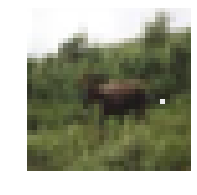

In [61]:
show_image(test[3])

In [43]:
learn.data.test_ds.items[:5]

array([WindowsPath('C:/Users/Tim/.fastai/data/cifar10/ktest/test/1.png'),
       WindowsPath('C:/Users/Tim/.fastai/data/cifar10/ktest/test/10.png'),
       WindowsPath('C:/Users/Tim/.fastai/data/cifar10/ktest/test/100.png'),
       WindowsPath('C:/Users/Tim/.fastai/data/cifar10/ktest/test/1000.png'),
       WindowsPath('C:/Users/Tim/.fastai/data/cifar10/ktest/test/10000.png')], dtype=object)

In [52]:
preds[:5]

tensor([[5.8825e-04, 1.8417e-03, 3.3773e-03, 2.4865e-02, 9.5972e-01, 5.0168e-04,
         2.8519e-04, 1.8774e-03, 2.4430e-04, 6.7034e-03],
        [1.8104e-05, 4.2821e-06, 1.2115e-04, 9.9229e-01, 7.4060e-05, 9.1740e-05,
         7.2355e-03, 1.3819e-04, 7.1405e-06, 1.8397e-05],
        [2.9813e-05, 2.3592e-06, 9.9342e-01, 2.9318e-04, 6.0563e-03, 5.7937e-05,
         1.2931e-04, 1.7813e-06, 8.1394e-06, 2.6911e-06],
        [1.1781e-05, 2.2082e-05, 9.8022e-05, 1.2407e-04, 9.9890e-01, 7.0137e-05,
         1.3386e-05, 7.1854e-04, 1.8387e-05, 2.7872e-05],
        [5.0235e-05, 5.7807e-06, 2.3714e-03, 3.1207e-04, 1.3433e-03, 2.2276e-05,
         9.9585e-01, 6.6746e-06, 1.2252e-05, 2.4111e-05]])

In [58]:
results = ["" for x in range(preds.shape[0])]

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',


In [59]:
for i in np.arange(preds.shape[0]):
    results[i] = classes[np.argmax(preds[i]).numpy()] 

results

['deer',
 'cat',
 'bird',
 'deer',
 'frog',
 'bird',
 'deer',
 'airplane',
 'frog',
 'automobile',
 'frog',
 'truck',
 'frog',
 'airplane',
 'truck',
 'cat',
 'horse',
 'dog',
 'horse',
 'airplane',
 'cat',
 'truck',
 'dog',
 'automobile',
 'truck',
 'cat',
 'ship',
 'dog',
 'horse',
 'ship',
 'automobile',
 'frog',
 'truck',
 'deer',
 'frog',
 'automobile',
 'bird',
 'bird',
 'dog',
 'bird',
 'deer',
 'frog',
 'airplane',
 'deer',
 'cat',
 'truck',
 'deer',
 'airplane',
 'airplane',
 'bird',
 'airplane',
 'deer',
 'dog',
 'ship',
 'dog',
 'automobile',
 'truck',
 'frog',
 'bird',
 'frog',
 'cat',
 'cat',
 'deer',
 'truck',
 'automobile',
 'truck',
 'frog',
 'cat',
 'frog',
 'bird',
 'horse',
 'deer',
 'ship',
 'truck',
 'ship',
 'bird',
 'airplane',
 'ship',
 'cat',
 'automobile',
 'horse',
 'horse',
 'ship',
 'automobile',
 'bird',
 'dog',
 'frog',
 'horse',
 'automobile',
 'ship',
 'bird',
 'frog',
 'airplane',
 'automobile',
 'airplane',
 'bird',
 'automobile',
 'cat',
 'deer',
 'a

In [62]:
# since the filename is like test_1.jpg, test_2.jpg, ... we extract id from filenames
ids = [item.name[:-4] for item in learn.data.test_ds.items]
ids[:5]

['1', '10', '100', '1000', '10000']

In [63]:
df = pd.DataFrame({'id':ids, 'label':results}, columns=['id', 'label'])
df.head()

,id,label
0,1,deer
1,10,cat
2,100,bird
3,1000,deer
4,10000,frog


In [64]:
df.to_csv(path/'submission.csv', index=False)

In [ ]:
#! kaggle competitions submit -c cifar-10 -f {path/'submission.csv'} -m "Fastai is awesome, Tim@Shanghai"